In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
cf_df = pd.read_csv("Data/CF_Fatma_label_confidence_judgments_finalized_clean_text_28_05_2018.csv")

In [168]:
#gmt_offset = -4

cf_df['ts'] = pd.to_datetime(cf_df['created_at'])
#cf_df['ts'] = cf_df.ts + pd.to_timedelta(gmt_offset, unit='h')

In [169]:
#add day of week and hour of day
cf_df['hod'] = [t.hour for t in cf_df.ts]
cf_df['dow'] = [t.dayofweek for t in cf_df.ts]
cf_df['date'] = [t.date() for t in cf_df.ts]

In [170]:
cf_df.head()

,Unnamed: 0,_unit_id,_golden,_unit_state_x,_trusted_judgments,_last_judgment_at_x,violence_judgment,violence,violence_confidence,protest_judgment_x,...,created_at,id,proccd_text,Fatma_protest,Fatma_violence,clean_text,ts,hod,dow,date
0,0,1657977939,False,finalized,3,3/30/2018 15:01:20,"""nan""",0.0,1.0000,"""000""",...,Sat Jun 15 12:14:33 +0000 2013,3.460000e+17,lawn goose clothes lot DD outfit pattern sewin...,0,0,lawn goose clothes lot outfit pattern sewing u...,2013-06-15 12:14:33,12,5,2013-06-15
1,1,1657977940,False,finalized,3,3/30/2018 15:11:00,"""010""",0.0,0.6606,"""111""",...,Tue Jun 04 16:04:35 +0000 2013,3.420000e+17,rt usrId turkish police have blacked out id nu...,1,0,police blacked id numbers helmuts,2013-06-04 16:04:35,16,1,2013-06-04
2,2,1657977941,False,finalized,3,3/30/2018 15:05:25,"""000""",0.0,1.0000,"""111""",...,Sat Jun 01 07:12:41 +0000 2013,3.410000e+17,rt usrId #occupy #taksim protesters in #istanb...,1,0,occupy call akp govt,2013-06-01 07:12:41,7,5,2013-06-01
3,3,1657977942,False,finalized,3,04/06/18 11:49,"""1""",0.0,0.0000,"""010""",...,Sun Jun 09 14:53:50 +0000 2013,3.440000e+17,rt usrId usrId erdogan says vandals entering m...,0,0,erdogan says vandals entering mosques beer bot...,2013-06-09 14:53:50,14,6,2013-06-09
4,4,1657977943,False,finalized,3,3/30/2018 15:33:35,"""nan""",0.0,1.0000,"""000""",...,Sat Jun 01 22:08:17 +0000 2013,3.410000e+17,photoset forest dreams turkey needs support as...,0,0,photoset forest dreams needs support always me...,2013-06-01 22:08:17,22,5,2013-06-01


In [171]:
hod_dict = {}
hod_count = {}
dow_dict = {}
weekday_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weekday_count ={}
ts = {}

In [172]:
cf_df_dow = cf_df.groupby('dow').count()

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x118791be0> has a label of '_unit_id' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11882cba8> has a label of '_golden' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11882cd68> has a label of '_unit_state_x' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11882ce80> has a label of '_trusted

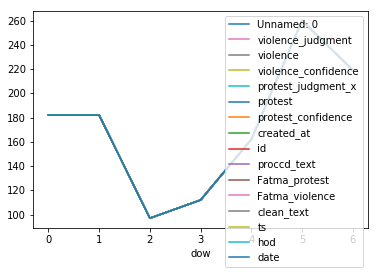

In [173]:
cf_df_dow.plot()

In [174]:
for i in cf_df['dow']:
    dow_dict[i] = len(cf_df[cf_df["dow"] == i])

In [175]:

for i in weekday_dict:
    if i in dow_dict:
        weekday_count[weekday_dict[i]]= dow_dict[i]

In [176]:
weekday_count

{'Fri': 162,
 'Mon': 182,
 'Sat': 260,
 'Sun': 219,
 'Thu': 112,
 'Tue': 182,
 'Wed': 97}

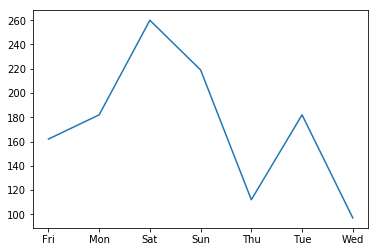

In [177]:
lists = sorted(weekday_count.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [178]:
cf_df_date = cf_df.groupby('date').count()
len(cf_df_date)

27

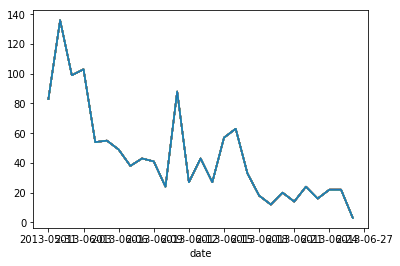

In [179]:
cf_df_date.plot(legend=False)

In [180]:
cf_df_date

,Unnamed: 0,_unit_id,_golden,_unit_state_x,_trusted_judgments,_last_judgment_at_x,violence_judgment,violence,violence_confidence,protest_judgment_x,...,protest_confidence,created_at,id,proccd_text,Fatma_protest,Fatma_violence,clean_text,ts,hod,dow
date,,,,,,,,,,,,,,,,,,,,,
2013-05-31,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
2013-06-01,136,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
2013-06-02,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
2013-06-03,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
2013-06-04,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
2013-06-05,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
2013-06-06,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
2013-06-07,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
2013-06-08,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


In [181]:
text_date_pool = []
text = []
for title,group in cf_df.groupby('date'):
    print(str(title))
    if len(group) > 5:
        text.append(cf_df[cf_df['date'] == title]['clean_text'])
    text_date_pool.append(text)    

2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26


In [186]:
for title,group in cf_df.groupby('date'):
    if len(group) > 5:
        df_text =  cf_df[cf_df['date'] == title]['clean_text']
        filename = "Data/" + str(title) +".csv"
        print (filename)
        df_text.to_csv(filename,index = False)

Data/2013-05-31.csv
Data/2013-06-01.csv
Data/2013-06-02.csv
Data/2013-06-03.csv
Data/2013-06-04.csv
Data/2013-06-05.csv
Data/2013-06-06.csv
Data/2013-06-07.csv
Data/2013-06-08.csv
Data/2013-06-09.csv
Data/2013-06-10.csv
Data/2013-06-11.csv
Data/2013-06-12.csv
Data/2013-06-13.csv
Data/2013-06-14.csv
Data/2013-06-15.csv
Data/2013-06-16.csv
Data/2013-06-17.csv
Data/2013-06-18.csv
Data/2013-06-19.csv
Data/2013-06-20.csv
Data/2013-06-21.csv
Data/2013-06-22.csv
Data/2013-06-23.csv
Data/2013-06-24.csv
Data/2013-06-25.csv
